## TASK 1 TITANIC SURVIVAL PREDICTION

In [71]:
# importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier

In [72]:
# import dataset
titanic_data = pd.read_csv("C:\\Users\\mincy\\Desktop\\codesoft\\titanic.csv")
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### Here we can understand that it has 418 rows(samples) and 12 columns(11 features and one target variable). Here cabin has more missing values. Fare has 1 missing values and age has 86 missing values. Other attributes do not have missing values

In [73]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Data Visualisation

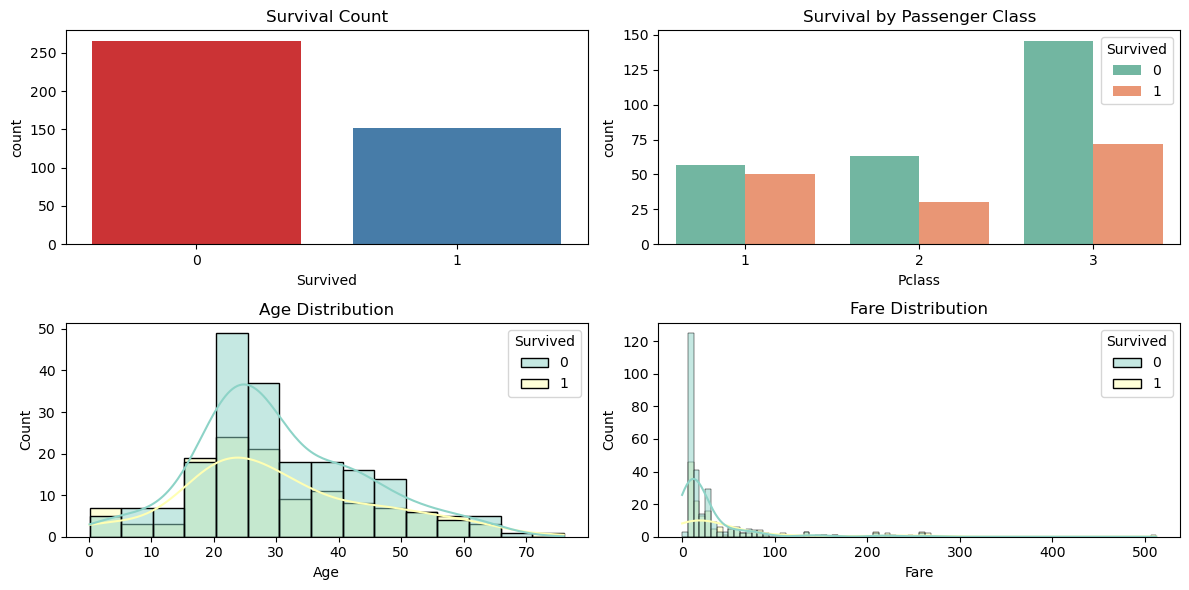

In [75]:
plt.figure(figsize=(12, 6))
# 1. Countplot for Survival
plt.subplot(2, 2, 1)
sns.countplot(data=titanic_data, x='Survived', palette="Set1")
plt.title("Survival Count")

# 2. Countplot for Pclass (Passenger Class)
plt.subplot(2, 2, 2)
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette="Set2")
plt.title("Survival by Passenger Class")

# 3. Age Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=titanic_data, x='Age', kde=True, hue='Survived', palette="Set3")
plt.title("Age Distribution")
# 4. Fare Distribution
plt.subplot(2, 2, 4)
sns.histplot(data=titanic_data, x='Fare', kde=True, hue='Survived', palette="Set3")
plt.title("Fare Distribution")

plt.tight_layout()
plt.show()

### Data preprocessing

In [76]:
# drop the passenger id
titanic_data = titanic_data.drop(['PassengerId'], axis=1)

In [77]:
#drop the cabin feature
titanic_data = titanic_data.drop(['Cabin'], axis=1)

In [78]:
# Calculate the mean age
mean_age = titanic_data['Age'].mean()

# Fill null values in the 'Age' column with the mean age
titanic_data['Age'].fillna(mean_age, inplace=True)

In [79]:
# Calculate the mode of the 'Embarked' column
mode_embarked = titanic_data['Embarked'].mode()[0]

# Fill null values in the 'Embarked' column with the mode
titanic_data['Embarked'].fillna(mode_embarked, inplace=True)

In [80]:
# drop the name
titanic_data = titanic_data.drop(['Name'], axis=1)

#drop ticket
titanic_data = titanic_data.drop(['Ticket'], axis=1)


In [81]:
# Define a mapping from sex to integers
sex_mapping = {"male": 0, "female": 1}

# Use the map function to replace the values in the 'Sex' column
titanic_data['Sex'] = titanic_data['Sex'].map(sex_mapping)

In [82]:
# Define a mapping from ports of embarkation to integers
embarked_mapping = {"C": 0, "Q": 1, "S": 2}

# Use the map function to replace the values in the 'Embarked' column
titanic_data['Embarked'] = titanic_data['Embarked'].map(embarked_mapping)

In [83]:
# Calculate the mean fare
mean_fare = titanic_data['Fare'].mean()

# Fill null values in the 'Fare' column with the mean fare
titanic_data['Fare'].fillna(mean_fare, inplace=True)

In [108]:
# Split data into features (X) and target (y)
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model training and prediction

In [109]:
# Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

100.0


In [110]:
# Here we get 100% accuracy. Which may be a case of overfitting. May be it is due to the dataset or we want some more data preprocessing.